In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Cargamos nuestro archivo CSV previamente ya preparado para su analisis, donde lo cargamos con la libreria pandas y mostramos las primeras 5 filas
df = pd.read_csv('Final.csv')

#Eliminamos la categoria de id de las columnas, esta no es necesaria en general solo es 1 categoria y ya se tiene el nombre
#creamos un df de la correlacion unicamente de los valores numericos
df = df.drop(columns=['ID_CATEGORY'])
dfCorr = df.corr(numeric_only=True)

#De nuestro DF principal nos aseguramos que sea de tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['BRAND'] == 'VANISH']

#Sacamos el producto mas vendido en cada uno de los Segmentos por Año, Formato y Caracteristicas de el Producto.
dfFormatSalesAtts = (df.groupby(['YEAR','FORMAT','ATTR1','ATTR2','ATTR3','ITEM_CODE'])[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum().reset_index()
    .sort_values(by=['YEAR','FORMAT','ATTR1','ATTR2','ATTR3','TOTAL_VALUE_SALES'], ascending = [True,True,True,True,True,False])
    .groupby(['YEAR','FORMAT','ATTR3']).head(1))
dfFormatSalesAtts

,YEAR,FORMAT,ATTR1,ATTR2,ATTR3,ITEM_CODE,TOTAL_UNIT_SALES,TOTAL_VALUE_SALES
1,2021,GEL,SAFE BLEACH,FABRIC TREATMENT,BLANCO,7501058794956BP1,1.434,174.523
3,2021,GEL,SAFE BLEACH,FABRIC TREATMENT,ROSA,7501058794949BP1,2.820,355.856
7,2021,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA,7501058786548BP1,0.008,0.218
9,2021,POLVO,SAFE BLEACH,FABRIC TREATMENT,BLANCO,7501058792808BP1,0.368,52.220
17,2021,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,7702626204208BP1,29.986,297.723
20,2022,GEL,SAFE BLEACH,FABRIC TREATMENT,BLANCO,7501058796578BP2,46.448,2212.411
21,2022,GEL,SAFE BLEACH,FABRIC TREATMENT,ROSA,7501058794949BP1,28.252,3695.257
25,2022,LIQUIDO,SAFE BLEACH,FABRIC TREATMENT,ROSA,7501058786548BP1,0.118,5.494
27,2022,POLVO,SAFE BLEACH,FABRIC TREATMENT,BLANCO,7501058792808BP1,11.946,1620.525
36,2022,POLVO,SAFE BLEACH,FABRIC TREATMENT,ROSA,7702626204208BP1,1310.003,14137.109


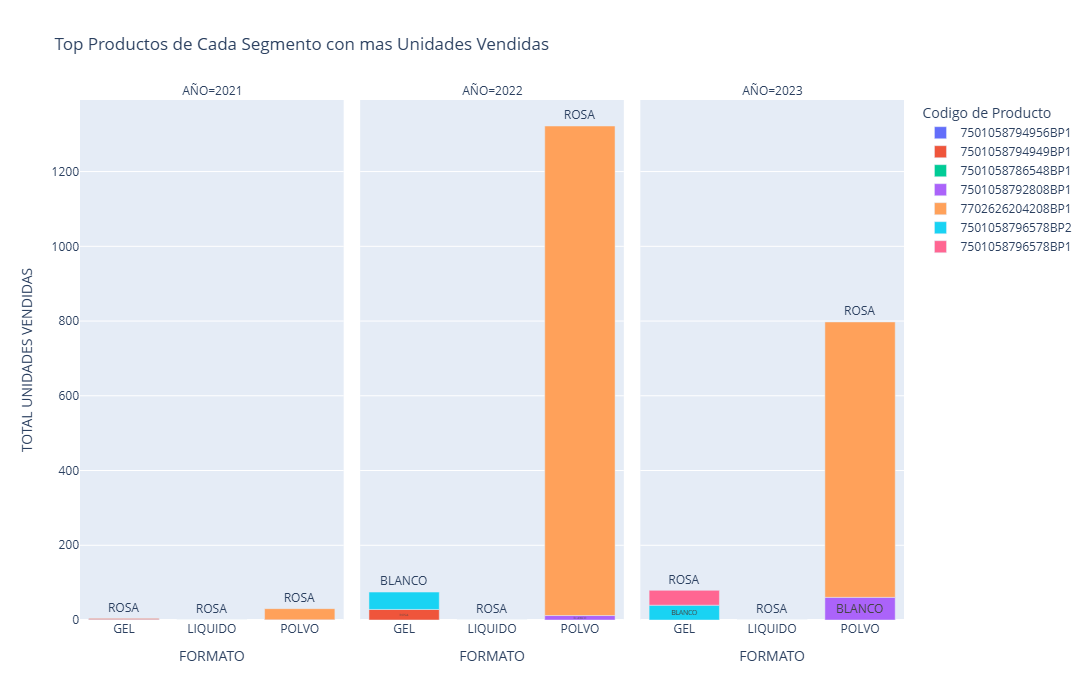

In [2]:
fig = px.bar(
    dfFormatSalesAtts,
    x="FORMAT",
    y="TOTAL_UNIT_SALES",
    color="ITEM_CODE",
    facet_col="YEAR",
    hover_data=["ATTR3"],
    text="ATTR3",
    title="Top Productos de Cada Segmento con mas Unidades Vendidas",
    height=700,
    labels={
        'YEAR': 'AÑO',
        'ATTR3': 'COLOR',
        'FORMAT': 'FORMATO',
        'TOTAL_UNIT_SALES' : 'TOTAL UNIDADES VENDIDAS',
        'ITEM_CODE': 'Codigo de Producto'
    }
)
fig.update_traces(textangle=0, textposition="outside")
fig.show()

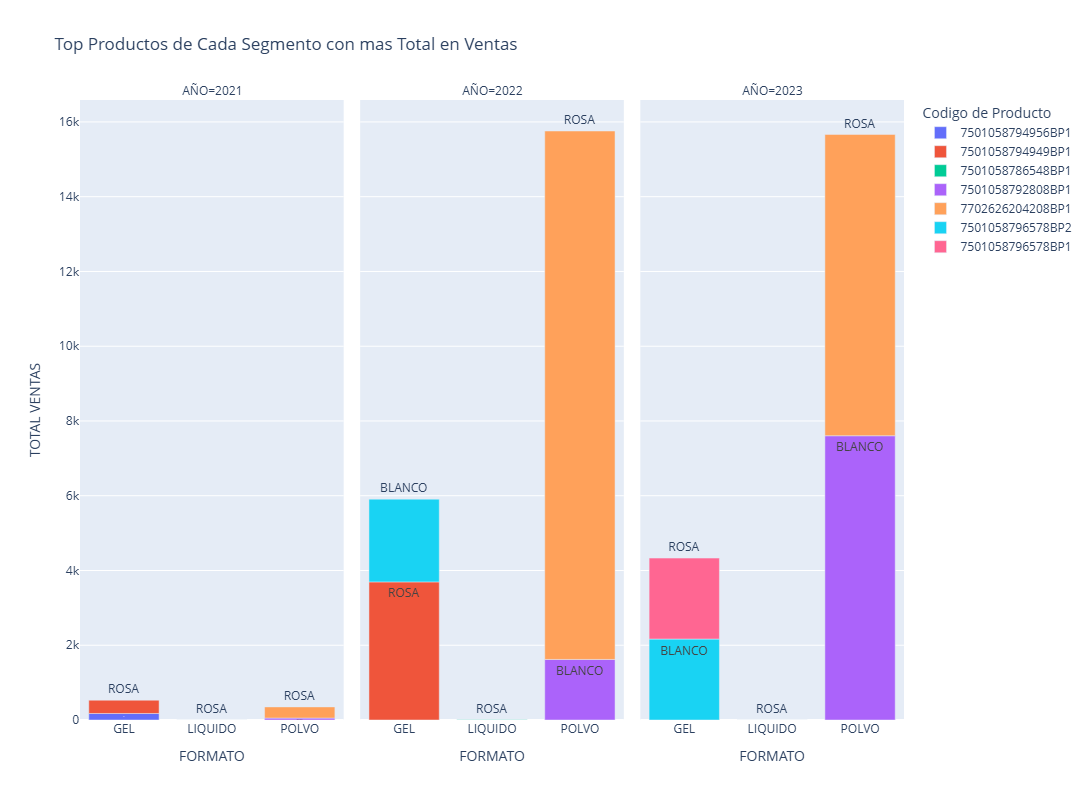

In [3]:
fig = px.bar(
    dfFormatSalesAtts,
    x="FORMAT",
    y="TOTAL_VALUE_SALES",
    color="ITEM_CODE",
    facet_col="YEAR",
    hover_data=["ATTR3"],
    text="ATTR3",
    title="Top Productos de Cada Segmento con mayor Total en Ventas",
    height=800,
    labels={
        'YEAR': 'AÑO',
        'ATTR3': 'COLOR',
        'FORMAT': 'FORMATO',
        'TOTAL_VALUE_SALES' : 'TOTAL VENTAS',
        'ITEM_CODE': 'Codigo de Producto'
    }
)
fig.update_traces(textangle=0, textposition="outside")
fig.show()